# Base de dados: Candidatos a vagas na mineradora de ouro

## Importando bibliotecas

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

## Importando base de dados

In [51]:
df = pd.read_csv("dados_candidatos.csv")
df

,Unnamed: 0,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,3,2011-07-01,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,2012-03-10,roux,47.0,9.0,35723.0,M,licence,geologie,66.47,non,0
19996,19996,2010-09-19,chatain,38.0,10.0,33570.0,F,master,geologie,62.29,non,1
19997,19997,2010-09-02,chatain,23.0,6.0,33751.0,F,doctorat,detective,103.48,oui,0
19998,19998,2011-12-06,chatain,33.0,11.0,34167.0,F,licence,detective,73.35,non,0


## Limpando os dados

### Renomeando as colunas

In [52]:
df = df.rename(columns={'date': 'data',
                       'cheveux': 'cabelo', 
                        'age': 'idade',
                        'exp': 'experiencia',
                        'salaire': 'salario',
                        'sexe': 'sexo',
                        'diplome': 'diploma',
                        'specialite': 'especialidade',
                        'note': 'nota',
                        'dispo': 'disponibilidade',
                        'embauche': 'contratado',
                        'Unnamed: 0':'id'
                       })
                   
df

,id,data,cabelo,idade,experiencia,salario,sexo,diploma,especialidade,nota,disponibilidade,contratado
0,0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,3,2011-07-01,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,2012-03-10,roux,47.0,9.0,35723.0,M,licence,geologie,66.47,non,0
19996,19996,2010-09-19,chatain,38.0,10.0,33570.0,F,master,geologie,62.29,non,1
19997,19997,2010-09-02,chatain,23.0,6.0,33751.0,F,doctorat,detective,103.48,oui,0
19998,19998,2011-12-06,chatain,33.0,11.0,34167.0,F,licence,detective,73.35,non,0


### Renomeando os dados categóricos

In [53]:
df['sexo'].replace({"F": "Feminino",
                       "M":"Masculino",
                       "": "Não informado"}
                      , inplace = True)

df['diploma'].replace({"licence": "Licenciatura",
                           "bac":"Bacharelado",
                           "master": "Mestrado",
                           "doctorat": "Doutorado",
                           "": "Sem Formação"}
                      , inplace = True)

df["cabelo"].replace({"roux": "Ruivo",
                      "chatain": "Loiro Escuro",
                      "blond": "Loiro",
                      "brun": "Castanho",
                      "": "Não Informado"}
                     , inplace = True)

df["especialidade"].replace({"archeologie": "Arqueologia",
                             "detective": "Detetive",
                             "forage": "Perfuração",
                             "geologie": "Geologia",
                             "": "Sem Especialização"}
                            , inplace = True)

df["disponibilidade"].replace({"non": "Não",
                               "oui": "Sim"}
                              , inplace = True)

df["contratado"].replace({0: "Não",
                               1: "Sim"}
                              , inplace = True)

# Resultado
df

,id,data,cabelo,idade,experiencia,salario,sexo,diploma,especialidade,nota,disponibilidade,contratado
0,0,2012-06-02,Ruivo,25.0,9.0,26803.0,Feminino,Licenciatura,Geologia,97.08,Não,Não
1,1,2011-04-21,Loiro,35.0,13.0,38166.0,Masculino,Licenciatura,Perfuração,63.86,Não,Não
2,2,2012-09-07,Loiro,29.0,13.0,35207.0,Masculino,Licenciatura,Geologia,78.50,Não,Não
3,3,2011-07-01,Castanho,NaN,12.0,32442.0,Masculino,Licenciatura,Geologia,45.09,Não,Não
4,4,2012-08-07,Ruivo,35.0,6.0,28533.0,Feminino,Licenciatura,Detetive,81.91,Não,Não
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,2012-03-10,Ruivo,47.0,9.0,35723.0,Masculino,Licenciatura,Geologia,66.47,Não,Não
19996,19996,2010-09-19,Loiro Escuro,38.0,10.0,33570.0,Feminino,Mestrado,Geologia,62.29,Não,Sim
19997,19997,2010-09-02,Loiro Escuro,23.0,6.0,33751.0,Feminino,Doutorado,Detetive,103.48,Sim,Não
19998,19998,2011-12-06,Loiro Escuro,33.0,11.0,34167.0,Feminino,Licenciatura,Detetive,73.35,Não,Não


### Removendo dados inválidos
Algumas variáveis da base de dados estão incoerentes, como idade negativa. Esse dados serão removidos.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20000 non-null  int64  
 1   data             19909 non-null  object 
 2   cabelo           19897 non-null  object 
 3   idade            19909 non-null  float64
 4   experiencia      19904 non-null  float64
 5   salario          19905 non-null  float64
 6   sexo             19900 non-null  object 
 7   diploma          19890 non-null  object 
 8   especialidade    19907 non-null  object 
 9   nota             19886 non-null  float64
 10  disponibilidade  19894 non-null  object 
 11  contratado       20000 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 1.8+ MB


In [55]:
# Removendo os valores nulos (NA, NaN...)
df = df[df['data'].notna()]
df = df[df['cabelo'].notna()]
df = df[df['idade'].notna()]
df = df[df['experiencia'].notna()]
df = df[df['salario'].notna()]
df = df[df['sexo'].notna()]
df = df[df['diploma'].notna()]
df = df[df['especialidade'].notna()]
df = df[df['nota'].notna()]
df = df[df['disponibilidade'].notna()]
df = df[df['contratado'].notna()]

# Idade não pode ser negativa
# Além disso, vamos considerar que pessoas com menos de 12 anos não estão trabalhando (idade mínima para trabalhar na França)
df = df[df['idade'] >= 12]

# Experiencia não pode ser menor que 0
df = df[df['experiencia'] >= 0]

# Nota não pode ser menor que 0
df = df[df['nota'] >= 0]

# Resultado
df

,id,data,cabelo,idade,experiencia,salario,sexo,diploma,especialidade,nota,disponibilidade,contratado
0,0,2012-06-02,Ruivo,25.0,9.0,26803.0,Feminino,Licenciatura,Geologia,97.08,Não,Não
1,1,2011-04-21,Loiro,35.0,13.0,38166.0,Masculino,Licenciatura,Perfuração,63.86,Não,Não
2,2,2012-09-07,Loiro,29.0,13.0,35207.0,Masculino,Licenciatura,Geologia,78.50,Não,Não
4,4,2012-08-07,Ruivo,35.0,6.0,28533.0,Feminino,Licenciatura,Detetive,81.91,Não,Não
5,5,2014-02-12,Loiro Escuro,37.0,8.0,38558.0,Masculino,Mestrado,Geologia,63.46,Não,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,2012-03-10,Ruivo,47.0,9.0,35723.0,Masculino,Licenciatura,Geologia,66.47,Não,Não
19996,19996,2010-09-19,Loiro Escuro,38.0,10.0,33570.0,Feminino,Mestrado,Geologia,62.29,Não,Sim
19997,19997,2010-09-02,Loiro Escuro,23.0,6.0,33751.0,Feminino,Doutorado,Detetive,103.48,Sim,Não
19998,19998,2011-12-06,Loiro Escuro,33.0,11.0,34167.0,Feminino,Licenciatura,Detetive,73.35,Não,Não


### Convertendo tipos de dados

In [56]:
# Convertendo 'idade' e 'experiência' de float para int
df['idade'] = df['idade'].astype('int')
df['experiencia'] = df['experiencia'].astype('int')

# Resultado
df

,id,data,cabelo,idade,experiencia,salario,sexo,diploma,especialidade,nota,disponibilidade,contratado
0,0,2012-06-02,Ruivo,25,9,26803.0,Feminino,Licenciatura,Geologia,97.08,Não,Não
1,1,2011-04-21,Loiro,35,13,38166.0,Masculino,Licenciatura,Perfuração,63.86,Não,Não
2,2,2012-09-07,Loiro,29,13,35207.0,Masculino,Licenciatura,Geologia,78.50,Não,Não
4,4,2012-08-07,Ruivo,35,6,28533.0,Feminino,Licenciatura,Detetive,81.91,Não,Não
5,5,2014-02-12,Loiro Escuro,37,8,38558.0,Masculino,Mestrado,Geologia,63.46,Não,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,2012-03-10,Ruivo,47,9,35723.0,Masculino,Licenciatura,Geologia,66.47,Não,Não
19996,19996,2010-09-19,Loiro Escuro,38,10,33570.0,Feminino,Mestrado,Geologia,62.29,Não,Sim
19997,19997,2010-09-02,Loiro Escuro,23,6,33751.0,Feminino,Doutorado,Detetive,103.48,Sim,Não
19998,19998,2011-12-06,Loiro Escuro,33,11,34167.0,Feminino,Licenciatura,Detetive,73.35,Não,Não


## Análise Exploratória dos Dados

### Uma pessoa com formação mais alta possui nota maior na prova?

A fim de analisarmos a relação entre o nível da formação de uma pessoa e a sua nota na prova, vamos construir um gráfico de boxplot. Para melhorar a sua interpretação, os boxplots foram ordenados de maneira crescente à sua mediana.

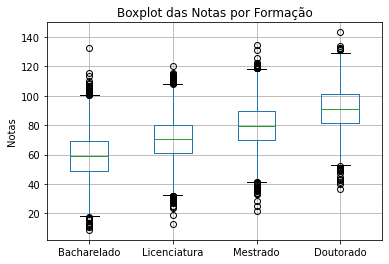

In [57]:
# Criando uma função para ordenar e plotar o boxplot
def boxplot_ordenado(df, by, column):
  df_h1_ordenado = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
  meds = df_h1_ordenado.median().sort_values()
  df_h1_ordenado[meds.index].boxplot()
  plt.title("Boxplot das Notas por Formação")
  plt.ylabel("Notas")

# Copiando o dataframe para não alterar o original
df_h1 = df    

# Aplicando a função
boxplot_ordenado(df_h1, by="diploma", column="nota")

Percebe-se, portanto, que a mediana das notas dos candidatos com um nível de formação maior tende a ser mais alta do que aqueles com um nível de formação menor.

### Pessoas mais velhas possuem mais experiência?
Para analisar essa questão, vamos plotar um gráfico de dispersão entre as variáveis Experiência e Idade.

Text(0, 0.5, 'Experiência (em anos)')

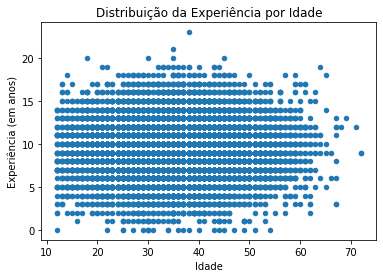

In [58]:
# Copiando o dataframe para não alterar o original
df_h2 = df

# Plotando o gráfico de dispersão, ajustando seu título e os nomes dos eixos
scatter_plot=df_h2.plot.scatter(x='idade',y='experiencia')
scatter_plot.plot()
plt.title("Distribuição da Experiência por Idade")
plt.xlabel("Idade")
plt.ylabel("Experiência (em anos)")

Observando o gráfico, percebe-se que não existe uma relação entre a idade e os anos de experiência de uma pessoa. Portanto, pessoas mais velhas não necessariamente possuem mais experiência que as outras.

### Existe influência da expectativa salarial com a contratação?

Nessa questão, foi construído um histograma de barras empilhadas, comparando a densidade de frequência dos contratados e dos não contratados distribuídas pela expectativa salarial.

Text(0, 0.5, 'Densidade de Frequência')

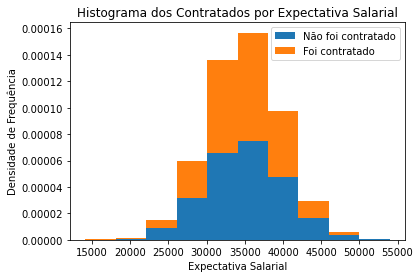

In [59]:
# Copiando o dataframe para não alterar o original
df_h31 = df

# Pivotando o dataframe e plotando o gráfico
df_h31[["salario", "contratado"]].pivot(columns="contratado").plot(kind="hist", stacked=True, density=True)
plt.legend(['Não foi contratado', 'Foi contratado'])
plt.title("Histograma dos Contratados por Expectativa Salarial")
plt.xlabel("Expectativa Salarial")
plt.ylabel("Densidade de Frequência")

Percebe-se, portanto, que a densidade para os contratados e não contratados é bem semelhante em todos os intervalos. Logo, provavelmente não existe uma influência da expectativa salarial na contratação.

## Existe influência da idade na contratação?

Com a intensão de enteder se existe alguma relação entre a idade a possibilidade de contrataação, fizemos este gráfico de Violino.

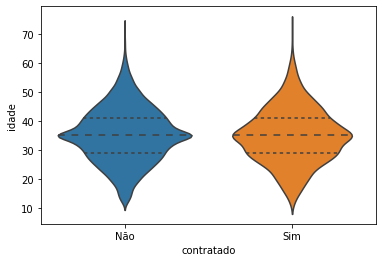

In [60]:
# Copiando o dataframe para não alterar o original
df_idade = df

# Plotando o violinplot
idade_contratacao = sns.violinplot(x="contratado", y="idade", data=df_idade, inner="quartile")

Torna-se visivel que a idade do indivíduo não influência no momento da contratação.

## Existe influência do gênero na contratação? 


Para responder tal pergunta, foram feitos dois gráficos de barras.

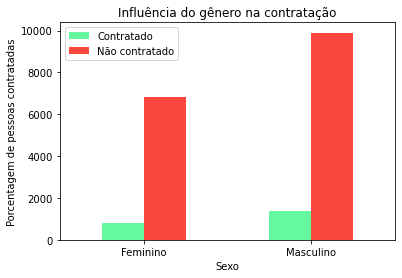

In [63]:
# Copiando o dataframe para não alterar o original
df_genero = df

# Selecionando as colunas desejadas
df_genero = df_genero[['contratado' , 'sexo']]

# Separando o dataframe em dois
contratado_genero = df_genero[df_genero['contratado'] == "Sim"]
nao_contratado_genero = df_genero[df_genero['contratado'] == "Não"]

# Contando as ocorrências
contratado_genero = contratado_genero.groupby('sexo').count()
nao_contratado_genero = nao_contratado_genero.groupby('sexo').count()

# Renomeando a coluna do dataframe de não contratados (tranformado em um série)
nao_contratado_genero = pd.Series(nao_contratado_genero['contratado'], name = ("nao_contratado"))

# Concatenando para retornar ao dataframe desejado
contratado_genero = pd.concat([contratado_genero, nao_contratado_genero], axis=1)

# Criando uma paleta de cores (foi utilizado o adobe color para conseguir cores complementares)
cores_contratacao = ['#64FA9D', '#FA473D']

# Plotando o gráfico de barras duplas
contratado_genero.plot(kind='bar', rot=0, color = cores_contratacao)
plt.title("Influência do gênero na contratação")
plt.xlabel("Sexo")
plt.ylabel("Porcentagem de pessoas contratadas")
plt.legend(['Contratado', 'Não contratado'])

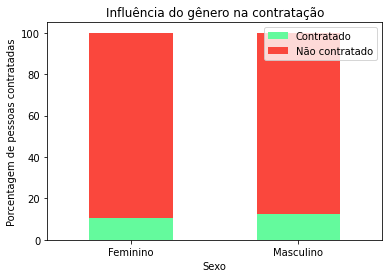

In [64]:
# Plotando o gráfico de barras emppilhadas
stacked_data = contratado_genero.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, rot=0, color = cores_contratacao)
plt.title("Influência do gênero na contratação")
plt.xlabel("Sexo")
plt.ylabel("Porcentagem de pessoas contratadas")
plt.legend(['Contratado', 'Não contratado'])

Depois de analisarmos os dois gráficos, fica nítido que o gênero da pessoa não possui influência na contratação da mesma.

## Existe influência da especialização com as notas?

Para checar se há relação entre a especialização e as notas, foram feitos dois gráficos de barras.

In [65]:
df_media = df

In [66]:
df_media[['especialidade', 'nota']].groupby(['especialidade']).mean()


,nota
especialidade,
Arqueologia,81.309573
Detetive,78.648512
Geologia,72.529291
Perfuração,75.982631


Text(0, 0.5, 'Média Nota')

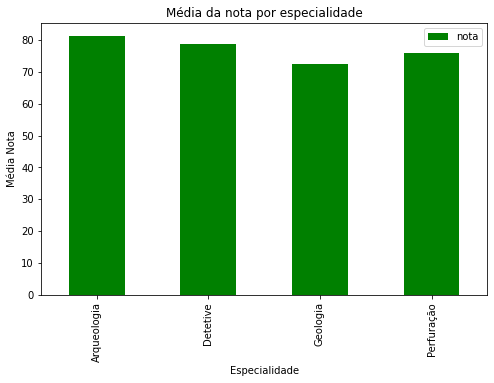

In [67]:
cor = ['green']

df_media[['especialidade', 'nota']].groupby(['especialidade']).mean().plot(figsize = (8,5), kind = 'bar', color = cor)
plt.title('Média da nota por especialidade')
plt.xlabel('Especialidade')
plt.ylabel('Média Nota')

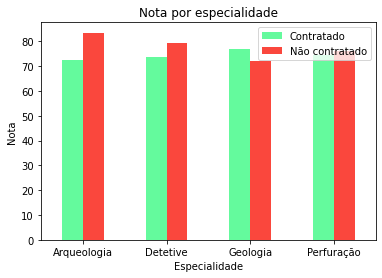

In [68]:
# Copiando o dataframe para não alterar o original
df_especialidade = df

# Selecionando as colunas desejadas
df_especialidade = df_especialidade[['contratado' , 'nota', 'especialidade']]

# Separando o dataframe em dois
especialidade_contratado = df_especialidade[df_especialidade['contratado'] == "Sim"]
especialidade_nao_contratado = df_especialidade[df_especialidade['contratado'] == "Não"]

# Contando as ocorrências
especialidade_contratado = especialidade_contratado.groupby('especialidade').mean()
especialidade_nao_contratado = especialidade_nao_contratado.groupby('especialidade').mean()

# Renomeando a coluna do dataframe de não contratados (tranformado em um série)
especialidade_contratado = pd.Series(especialidade_contratado['nota'], name = ("nota_contratado"))
nao_contratado_genero = pd.Series(especialidade_nao_contratado['nota'], name = ("nota_nao_contratado"))

# Concatenando para retornar ao dataframe desejado
df_especialidade = pd.concat([especialidade_contratado, especialidade_nao_contratado], axis=1)

#Resultado
df_especialidade

# Plotando o gráfico de barras duplas
df_especialidade.plot(kind='bar', rot=0, color = cores_contratacao)
plt.title("Nota por especialidade")
plt.xlabel("Especialidade")
plt.ylabel("Nota")
plt.legend(['Contratado', 'Não contratado'])

Depois de analizar os gráficos, percebe-se que a especialidade interfere minimamente na nota.

## Pessoas com mais experiência possuem preferência na contratação?

Com a finalidade de compreendermos se existe alguma relação entre pessoas com mais experiências e uma maior contratação, fizemos este histograma.

Text(0, 0.5, 'Densidade de Frequência')

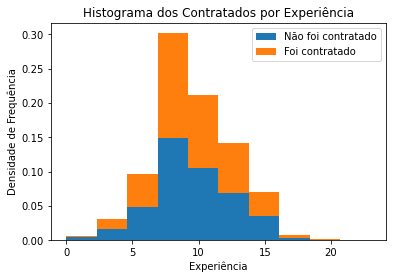

In [69]:
# Copiando o dataframe para não alterar o original
df_h_exp_cont = df

# Pivotando o dataframe e plotando o gráfico
df_h_exp_cont[["experiencia", "contratado"]].pivot(columns="contratado").plot(kind="hist", stacked=True, density=True)
plt.legend(['Não foi contratado', 'Foi contratado'])
plt.title("Histograma dos Contratados por Experiência")
plt.xlabel("Experiência")
plt.ylabel("Densidade de Frequência")

Percebe-se, portanto, que a densidade para os contratados e não contratados depende da experiência do contratado (principalmente nos intervalos entre 10 e 15.).
Logo, provavelmente existe uma influência da experiência na contratação dessa mineradora.